# Importing libraries

In [33]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt

# Load the MNIST Dataset

In [2]:
MNIST_Image_data = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
(x_train, y_train),(x_test, y_test)= MNIST_Image_data
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

**Have a look at sample image**

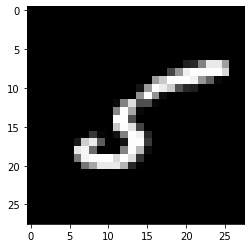

In [9]:
plt.imshow(x_train[11], cmap= plt.get_cmap('gray'))

## Lets built MNIST digit classification using CNN

Reshape the data

In [12]:
# Building the input vector from the 28 X 28 image pixels.
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1).astype('float32')
X_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [13]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 28, 28, 1), dtype('float32'), (10000, 28, 28, 1), dtype('float32'))

#### Normalize the data





In [14]:
X_train = X_train / 255   # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255     # Scaling values from (0,255) -> (0,1)

In [15]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## One-hot encoding for labels by using Keras numpy utilities`

In [21]:
# Before one hot encoding 
y_train, y_train.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [28]:
# After onehot encoding
num_classes = 10
Y_train= np_utils.to_categorical(y_train,num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [29]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Building the CNN model

In [34]:
model = Sequential()
# Add Convolution Layers. Here we are adding only 1 convolution layer. If you want, can add more.
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
#Flatten the output of convolution layer
model.add(Flatten())
#Add hidden layer. here I am ading only one hidden layer.
model.add(Dense(784, activation='relu'))
# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 25)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16900)             0         
                                                                 
 dense (Dense)               (None, 784)               13250384  
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 13,258,484
Trainable params: 13,258,484
Non-trainable params: 0
__________________________________________

In [36]:
# compiling the sequential model
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [37]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 181s 385ms/step - loss: 0.1478 - accuracy: 0.9555 - val_loss: 0.0589 - val_accuracy: 0.9794
Epoch 2/10
469/469 [==============================] - 180s 385ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0468 - val_accuracy: 0.9844
Epoch 3/10
469/469 [==============================] - 181s 386ms/step - loss: 0.0175 - accuracy: 0.9946 - val_loss: 0.0505 - val_accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 181s 387ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0487 - val_accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 182s 388ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0577 - val_accuracy: 0.9848
Epoch 6/10
469/469 [==============================] - 181s 386ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0593 - val_accuracy: 0.9829
Epoch 7/10
469/469 [==============================] - 181s 387ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0557 -

#Summary

* Amazing, we achived ~99.8% accuracy and 98.5% validation accuracy.
* MNIST is a beginner-friendly dataset in computer vision. It’s easy to score 90%+ on validation by using a CNN model with only one convolution layer.